In [17]:
import pandas as pd
import numpy as np
import glob

import time

from scipy import linalg

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [20]:
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances


from scipy.spatial.distance import squareform



In [32]:
tsne = TSNE()

# Example

In [24]:
X, y = load_digits(return_X_y=True)

In [25]:
X.shape

(1797, 64)

In [26]:
y.shape

(1797,)

In [33]:
X_embedded = tsne.fit_transform(X)

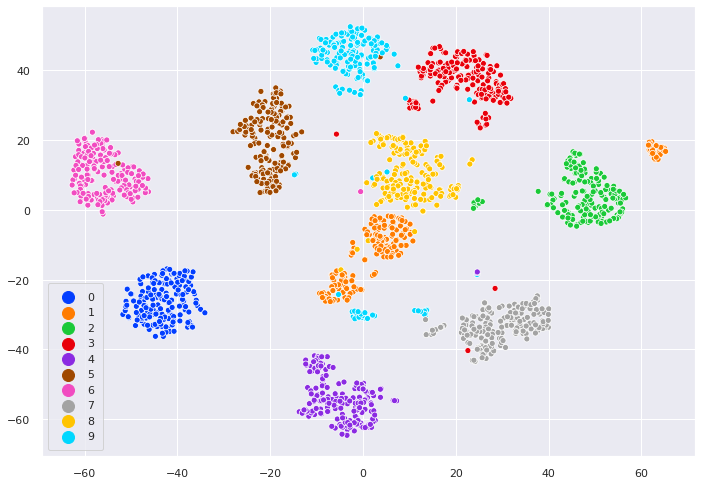

In [34]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y, legend='full', palette=palette)

# Embedding TSNE

In [28]:
'''
t-Distributed Stochastic Neighbor Embedding (t-SNE)
'''

MACHINE_EPSILON = np.finfo(np.double).eps
n_components = 2
perplexity = 30

In [3]:

filtered_files = glob.glob("comments/raw_comments/*_filtered.fea")

In [35]:
for file in filtered_files[0:1]:
    
    print(file)
    df_sales = pd.read_feather(file)
    print(len(df_sales))
    tic = time.time()
    
    embed_file = file.split('.')[0] + '_embedding.fea'
    df_sales_embeddings = pd.read_feather(embed_file) 
    
    embedding_array = df_sales_embeddings.iloc[:,1:].to_numpy()
    
    '''
    t-Distributed Stochastic Neighbor Embedding (t-SNE)
    '''
    embedding_array_embedded = tsne.fit_transform(embedding_array)
    

comments/raw_comments/agent_comments_AL_filtered.fea
219915


In [36]:
embedding_array_embedded.shape

(219915, 2)

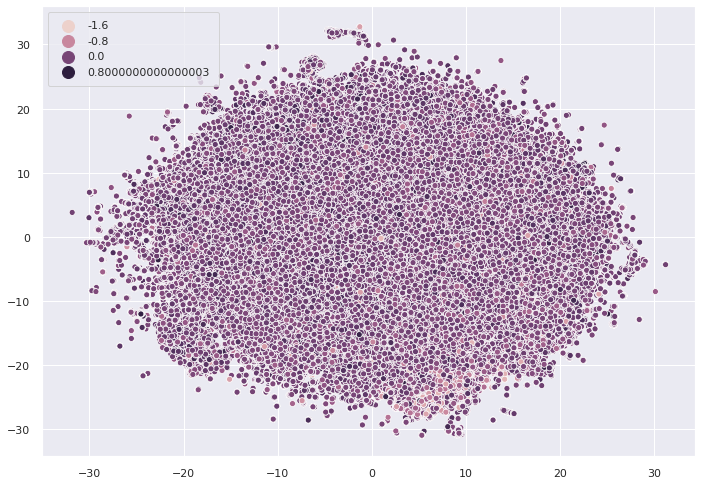

In [41]:
sns.scatterplot(embedding_array_embedded[:,0], embedding_array_embedded[:,1], 
                hue=df_sales.avmerror.values)

In [39]:
df_sales.avmerror.values

array([-0.92133618, -0.00128454, -0.05793141, ...,  0.14931981,
       -0.08330718,  0.11006052])